# Problem
Create an edge detector using convolutions.

# Setup
Import libraries and load the image.

In [5]:
from PIL import Image
import math
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

Shape: (500, 500) | dtype: uint8
Hella hawt


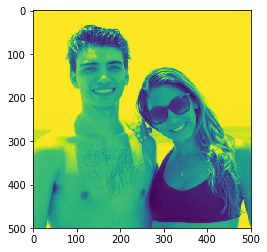

In [6]:
original = np.asarray(Image.open('sam.jpg').convert('L'))
print('Shape:', original.shape, '| dtype:', original.dtype)
imshow(original)
print('Hella hawt')

Modify the functionfrom our blurring project earlier so that it accepts in a function

In [7]:
def apply_transformation(tensor, transform, size, step):
    """
    Applies a transformation to each subtensor throughout the image based on the given transformation
    
    --Parameters--
    tensor: a numpy tensor with dimension greater than or equal to 2 (3d, 4d, 5d...) 
    transform: the transformation function to apply on the subtensor
    size: size of the convolution square
    step: 
    """
    w = tensor.shape[0]
    h = tensor.shape[1]
    margin = int(size/2)
    transformed = np.zeros_like(tensor)
    for x in range(0, w, step):
        for y in range(0, h, step):
            # define the reg3ion to extract the submatrix from
            xmin = x-margin if x-margin >= 0 else 0
            xmax = x+margin+1 if x+margin+1 < w else w
            ymin = y-margin if y-margin >= 0 else 0
            ymax = y+margin+1 if y+margin+1 < h else h
            # apply the transformation to the submatrix
            transformed[xmin:xmax, ymin:ymax] = transform(tensor[xmin:xmax, ymin:ymax])
    return transformed

Define a sobel edge detector function using sobel kernels. Found sobel here: http://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm

In [8]:
# requires step size 1? size 3
def make_sobel_edge_func(strength=2):
    def sobel_edge(submatrix):
        if submatrix.shape != (3,3):
            return 0
        gx = np.array([[-1, 0, 1],
                       [-strength, 0, strength],
                       [-1, 0, 1]])
        gy = np.array([[1, strength, 1],
                      [0, 0, 0],
                      [-1, -strength, -1]])
        return math.sqrt(np.sum(np.multiply(gx, submatrix))**2 + np.sum(np.multiply(gy, submatrix))**2)
    return sobel_edge

In [14]:
s1 = make_sobel_edge_func(1)
s2 = make_sobel_edge_func(2)
s5 = make_sobel_edge_func(5)
s10 = make_sobel_edge_func(10)
s100 = make_sobel_edge_func(100)

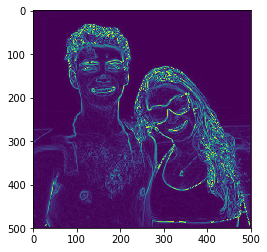

In [10]:
imshow(apply_transformation(original, s1, 3, 1))

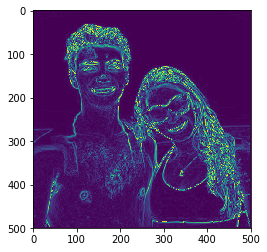

In [11]:
imshow(apply_transformation(original, s2, 3, 1))

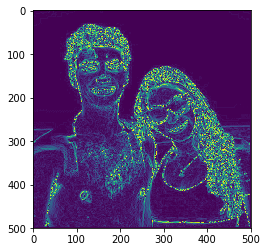

In [12]:
imshow(apply_transformation(original, s5, 3, 1))

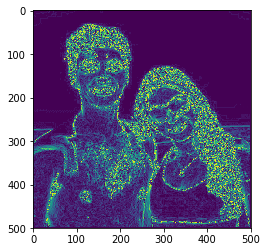

In [13]:
imshow(apply_transformation(original, s10, 3, 1))

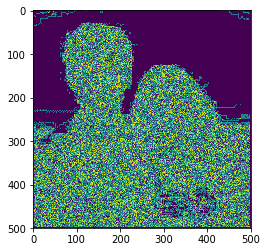

In [15]:
imshow(apply_transformation(original, s100, 3, 1))